# Промежуточная аттестация по сетям искусcтвенных нейронов.
## Задание

**Ваша задача - создать классификатор изображений с помощью Keras и сверточных нейронных сетей для набора данных Fashion MNIST. Этот набор данных включает 10 меток с разными типами одежды с изображениями 28 на 28 * в оттенках серого *. Имеется обучающий набор из 60 000 изображений и 10 000 тестовых изображений.**

Описание классов

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

## Данные

**Загружаем данные**

In [151]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


## Визаулизация датасета

**Используйте matplotlib чтобы показать пример картинки.**

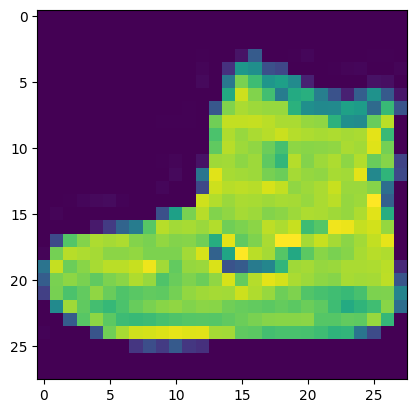

In [152]:
plt.imshow(train_images[0])

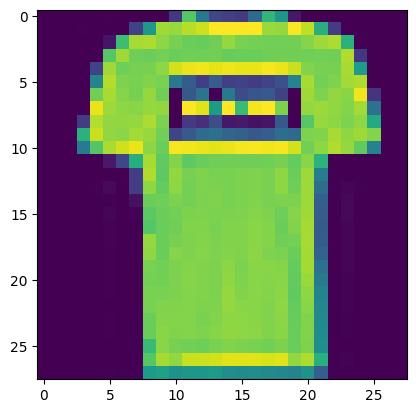

In [153]:
plt.imshow(train_images[1])

## Предобработка

**Нормализуйте данные X_train и X_test **

In [154]:
x_train = x_train.astype('float32') / 255.0
x_text = x_test.astype('float32') / 255.0

**Измените форму массивов X_train и X_test так, чтобы они стали 4-мерными**
batch_size x channels x H x W

In [155]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

**Преобразуйте  y_train и y_test в one_hot представления **

In [156]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## Создайте модель

**Примерная структура модели. При выполнении задания вы можете поэкспериментировать со слоями**

* Сверточный слой, 32 фильтра, размер ядра=(4,4)
* Пулинг с pool_size = (2,2)

* Выпрямляющий слой (Flatten)
* Полносвязный слой (например 128 нейронов), RELU 

* Выходной полносвязный слой с 10 нейронами с softmax 

**При компиляции укажите loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [157]:
model = keras.Sequential([
keras.layers.Reshape(target_shape=(28, 28, 1), input_shape=(28, 28)),
keras.layers.Conv2D(filters=32, kernel_size=(4, 4), activation='relu'),
keras.layers.MaxPooling2D(pool_size=(2, 2)),
keras.layers.Flatten(),
keras.layers.Dense(units=128, activation='relu'),
keras.layers.Dense(units=num_classes, activation='softmax')
])

In [158]:
layers = model.layers
for layer in layers:
    print(layer)

In [159]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_7 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
 conv2d_11 (Conv2D)          (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 12, 12, 32)        0         
 ng2D)                                                           
                                                                 
 flatten_11 (Flatten)        (None, 4608)              0         
                                                                 
 dense_22 (Dense)            (None, 128)               589952    
                                                                 
 dense_23 (Dense)            (None, 10)                1290      
                                                     

In [160]:
weights_before_training = model.layers[1].get_weights()[0]
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### Тренировка модели
**Тренируем модель на x_train. Число эпох выберите самостоятельно**

In [161]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4123 - accuracy: 0.8534
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2805 - accuracy: 0.8978
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2406 - accuracy: 0.9123
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2112 - accuracy: 0.9227
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1910 - accuracy: 0.9306
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1723 - accuracy: 0.9378
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1552 - accuracy: 0.9445
Epoch 8/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1446 - accuracy: 0.9482
Epoch 9/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1329 - accuracy: 0.9525
Epoch 10/10
1875/1875 [==============================] - 15s 8ms/step - l

### Оценка модели

**Оцените модель по метрикам accuracy,precision,recall,f1-score на тестовой выборке x_test **

In [162]:
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

313/313 [==============================] - 1s 2ms/step


In [163]:
classification_report_test = classification_report(y_true_labels, y_pred_labels)
print("Classification Report для тестовой выборки:")
print(classification_report_test)

Classification Report для тестовой выборки:
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1000
           1       0.99      0.96      0.97      1000
           2       0.96      0.58      0.72      1000
           3       0.90      0.89      0.89      1000
           4       0.66      0.93      0.77      1000
           5       0.94      0.99      0.96      1000
           6       0.63      0.76      0.69      1000
           7       0.97      0.90      0.93      1000
           8       0.99      0.96      0.98      1000
           9       0.93      0.97      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.89      0.87      0.87     10000
weighted avg       0.89      0.87      0.87     10000



## Дополнительно
 
* Отрисуйте фильтры на слое Conv2D, сравните до и после обучения модели

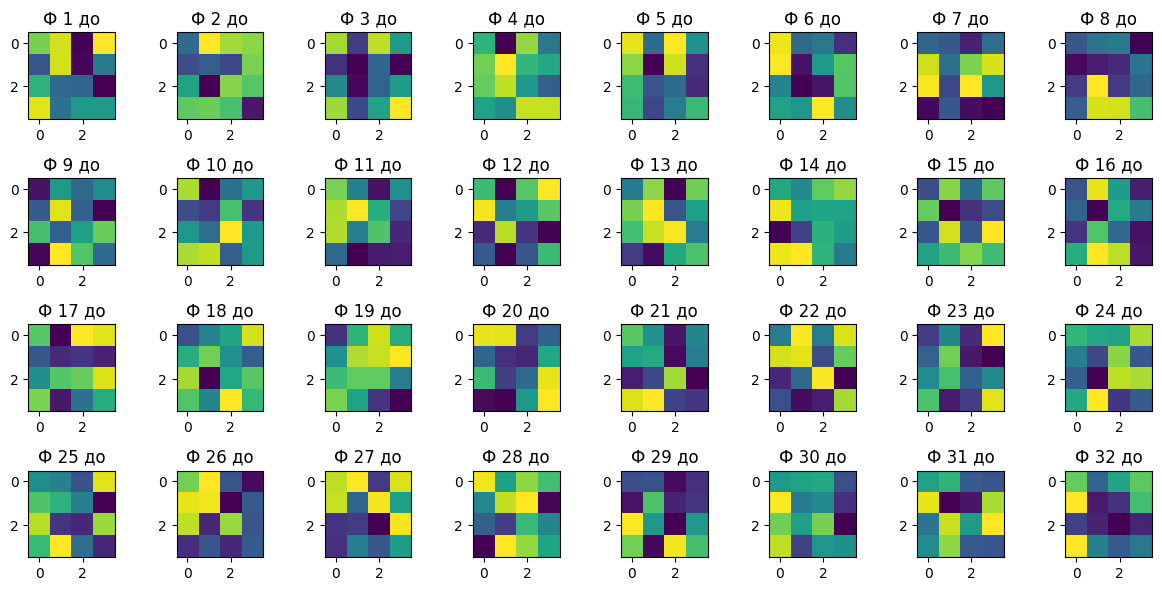

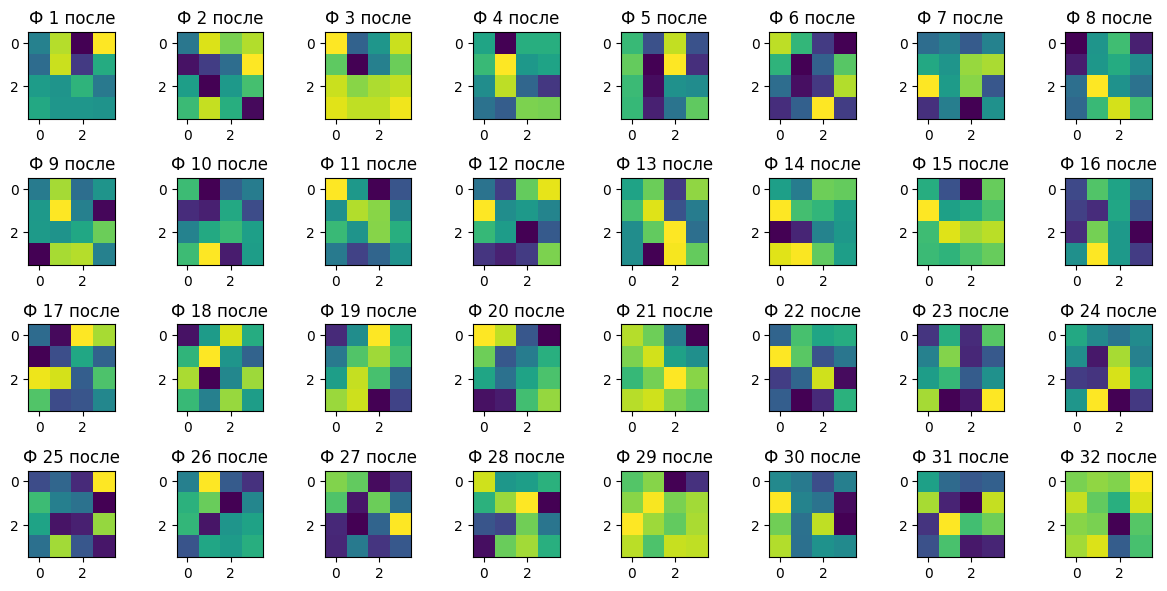

In [168]:
# Получение весов слоя Conv2D после обучения
weights_after_training = model.layers[1].get_weights()[0]

# Отображение фильтров до и после обучения
fig, axs = plt.subplots(nrows=4, ncols=8, figsize=(12, 6))

for i, ax in enumerate(axs.flat):
# Фильтры до обучения
    ax.imshow(weights_before_training[ :, :, 0, i],)
    ax.set_title(f'Ф {i+1} до')

plt.tight_layout()
plt.show()

fig, axs = plt.subplots(nrows=4, ncols=8, figsize=(12, 6))

for i, ax in enumerate(axs.flat):
# Фильтры после обучения
    ax.imshow(weights_after_training[:, :, 0, i],)
    ax.set_title(f'Ф {i+1} после')

plt.tight_layout()
plt.show()